In [1]:
!pip install basemap
!pip install basemap-data-hires
!pip install pandas
!pip install numpy
!pip install matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.animation as FuncAnimation
from IPython.display import HTML

**Task 1**
Geolocate and map the major airports of India


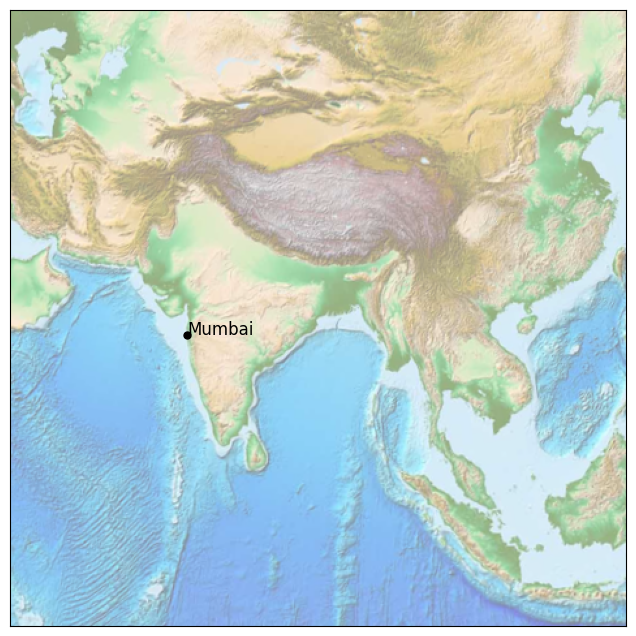

In [5]:
fig = plt.figure(figsize = (8,8), dpi=100)
m = Basemap(projection='lcc', resolution='h',
            width=7E6, height=7E6,
            lat_0=21.4399, lon_0=87.0149)
m.etopo(scale=0.5, alpha=0.5)

x, y = m(72.8777, 19.0760)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x,y, 'Mumbai', fontsize=12)

plt.savefig("mum_air.png")
plt.show()

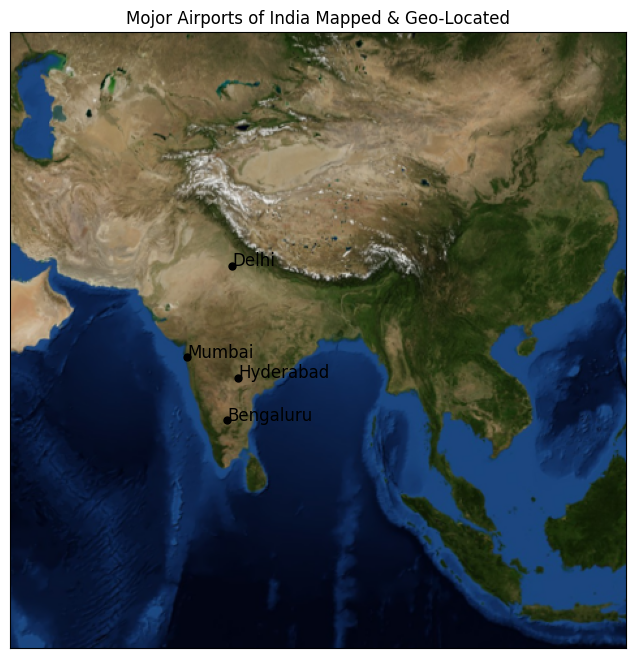

In [6]:
fig = plt.figure(figsize = (8,8), dpi=100)


m = Basemap(projection='lcc', resolution='h',
            width=7E6, height=7E6,
            lat_0=21.4399, lon_0=87.0149)
m.etopo(scale=0.5, alpha=0.5)
m.bluemarble(scale=0.5)



x, y = m(72.8777, 19.0760)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x,y, 'Mumbai', fontsize=12)

x1, y1 = m(77.1025, 28.7041)
plt.plot(x1, y1, 'ok', markersize=5)
plt.text(x1,y1, 'Delhi', fontsize=12)

x2, y2 = m(78.4867, 17.3850)
plt.plot(x2, y2, 'ok', markersize=5)
plt.text(x2,y2, 'Hyderabad', fontsize=12)

x3, y3 = m(77.5946, 12.9716)
plt.plot(x3, y3, 'ok', markersize=5)
plt.text(x3,y3, 'Bengaluru', fontsize=12)
plt.title('Mojor Airports of India Mapped & Geo-Located')

plt.savefig("maj_air.png")

plt.show()

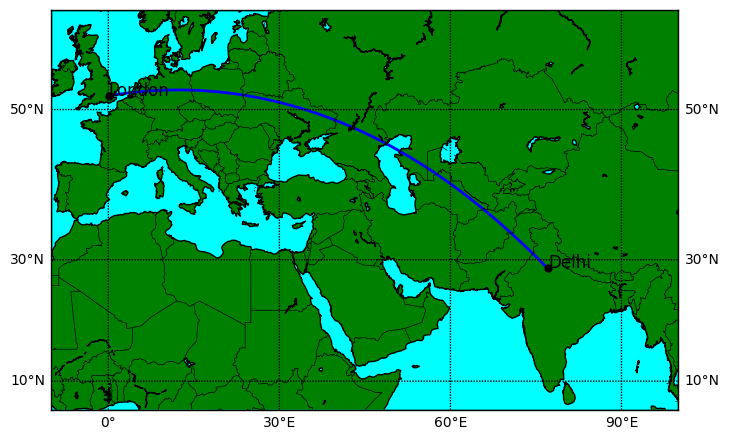

In [7]:
fig = plt.figure(figsize = (10,5), dpi=100)
ax = fig.add_axes([0.1,0.1,0.8,0.8])


m = Basemap(llcrnrlon=-10., llcrnrlat=5., urcrnrlon=100.,urcrnrlat=60.,
            rsphere=(6378137.00, 6356752.3142),
            projection='merc', resolution='l',
            lat_0=40., lon_0=-20., lat_ts=20.)
# m.bluemarble(scale=0.5)


ndlat = 28.7041; ndlon = 77.0125
lonlat = 51.53; lonlon = 0.08

m.drawgreatcircle(ndlon, ndlat, lonlon, lonlat, linewidth=2, color='b')


m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='g', lake_color='aqua')
m.drawparallels(np.arange(10, 90, 20), labels=[1,1,0,1])
m.drawmeridians(np.arange(-180, 180, 30), labels=[1,1,0,1])


x, y = m(0.08, 51.53)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x,y, 'London', fontsize=12)

x1, y1 = m(77.1025, 28.7041)
plt.plot(x1, y1, 'ok', markersize=5)
plt.text(x1,y1, 'Delhi', fontsize=12)

plt.savefig("Traj_map.png")

plt.show()

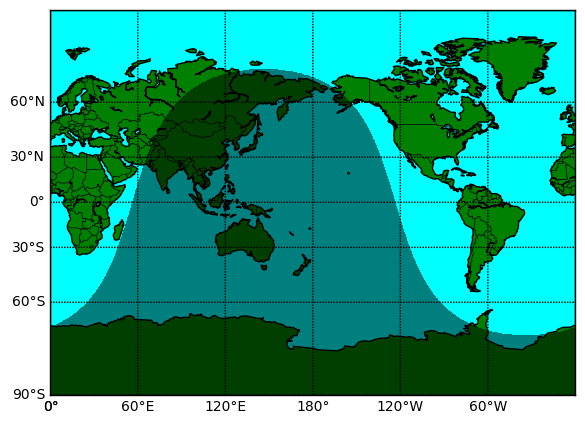

In [8]:
from datetime import datetime

fig = plt.figure(figsize = (10,5), dpi=100)


m = Basemap(projection='mill', lon_0=180.)

m.drawcoastlines()
m.drawcountries()

m.drawmapboundary(fill_color='aqua')

m.fillcontinents(color='g', lake_color='aqua')

m.drawparallels(np.arange(-90,90,30), labels=[1,0,0,0])
m.drawmeridians(np.arange(m.lonmin,m.lonmax+30,60), labels=[0,0,0,1])

date = datetime.utcnow()
cs = m.nightshade(date)

#the below line have some formating error, we will solve it later

#plt.title('world day/night map for %s (UTC) on miller cylindrical projection', %date.strftime("%d %b %y H;%M:%S"))
plt.savefig("nightshade.png")
plt.show()

In [9]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

<ipython-input-11-b3f3f3da2976>:35: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  aircraft_marker.set_data(x_interp[frame], y_interp[frame]);


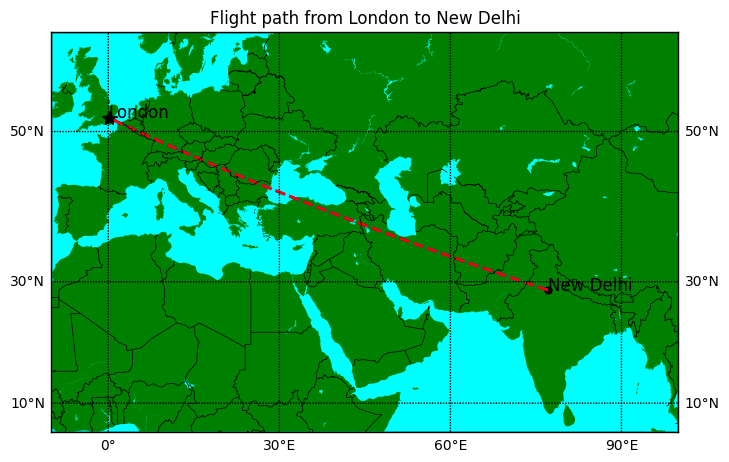

In [11]:
fig = plt.figure(figsize=(10, 5), dpi=100);
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]);


m = Basemap(llcrnrlon=-10., llcrnrlat=5., urcrnrlon=100., urcrnrlat=60.,
rsphere=(6378137.00, 6356752.3142),
resolution='l', projection='merc',
lat_0=40., lon_0=-20., lat_ts=20.)

ndlat = 28.7041; ndlon = 77.1025 # New Delhi
lonlat = 51.53; lonlon = 0.08 # London

x, y = m(0.08, 51.53) # London
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, 'London', fontsize=12)
x1, y1 = m(77.1025, 28.7041) # New Delhi
plt.plot(x1, y1, 'ok', markersize=5)
plt.text(x1, y1, 'New Delhi', fontsize=12)
num_points = 100 # Number of points to interpolate
lon_interp = np.linspace(ndlon, lonlon, num_points)
lat_interp = np.linspace(ndlat, lonlat, num_points)

x_interp, y_interp = m(lon_interp, lat_interp)
plt.plot(x_interp, y_interp, 'b--', linewidth=2)

line, = plt.plot([], [], 'r--', linewidth=2)

aircraft_marker, = plt.plot([], [], 'k*', markersize=10);
def init():
  line.set_data([], []);
  aircraft_marker.set_data([], []);
  return line, aircraft_marker;
def update(frame):
  line.set_data(x_interp[:frame], y_interp[:frame]);
  aircraft_marker.set_data(x_interp[frame], y_interp[frame]);
  return line, aircraft_marker;
  m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='green', lake_color='aqua')
m.drawparallels(np.arange(10, 90, 20), labels=[1, 1, 0, 1])
m.drawmeridians(np.arange(-180, 180, 30), labels=[1, 1, 0, 1])
ax.set_title('Flight path from London to New Delhi')

ani = FuncAnimation(fig, update, frames=num_points, init_func=init, interval=100, blit=True);

#HTML(ani.to_html5_video())
#HTML(ani.to_jshtml())

ani.save('name.gif', writer='pillow', fps=10)